# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from bs4 import BeautifulSoup
from urllib.parse import urljoin

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [3]:
# Resolver acá
buscar = "television"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)

data = response.json() # de este diccionario, nos interesa lo que esta dentro del diccionario "results"
items= data["results"] #aca me trae cada item con mucha informacion. Solo voy a mostrar el nombre, precio y el link del producto para que no sea confuso
for item in items:
    print("Título:", item.get("title"))
    print("Precio:", item.get("price"))
    print("Enlace:", item.get("permalink"))
    print("---------------")

Título: Led 50 Smart Tv Rca C50and-f 4k C/android
Precio: 656982
Enlace: https://www.mercadolibre.com.ar/led-50-smart-tv-rca-c50and-f-4k-candroid/p/MLA20005230#wid=MLA1888313586&sid=unknown
---------------
Título: Smart Tv Noblex Dv43x5150 Fhd 43 Pulgadas Vidaa
Precio: 439999
Enlace: https://www.mercadolibre.com.ar/smart-tv-noblex-dv43x5150-fhd-43-pulgadas-vidaa/p/MLA37902392#wid=MLA1439988303&sid=unknown
---------------
Título: Smart Philips 32 Hd 32phd6918/77 Google Tv Serie 6000
Precio: 342999
Enlace: https://www.mercadolibre.com.ar/smart-philips-32-hd-32phd691877-google-tv-serie-6000/p/MLA27954591#wid=MLA1604282662&sid=unknown
---------------
Título: Smart Tv Samsung 55 Cristal Uhd 4k Cu7000
Precio: 791999
Enlace: https://www.mercadolibre.com.ar/smart-tv-samsung-55-cristal-uhd-4k-cu7000/p/MLA28297083#wid=MLA1398643417&sid=unknown
---------------
Título: Smart Tv Philips 43 Fhd Google Tv Control Por Voz
Precio: 508999
Enlace: https://www.mercadolibre.com.ar/smart-tv-philips-43-fhd-g

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [4]:
# Resolver acá
# Hago una lista de diccionarios con títulos y precios (a partir de la variable items que hice arriba)
titulos_precios=[]
for item in items: 
    dicc={}
    dicc["Titulo"]= item.get("title")
    dicc["Precio"]= item.get("price")
    titulos_precios.append(dicc)

#creo dataframe con la lista titulos_precios
df=pd.DataFrame(titulos_precios)


#ahora con la columna "precio" voy a buscar el maximo, minimo y promedio

#voy a buscar los indices donde esta precio maximo, minimo para poder mostrar a que producto corresponden tambien 

idx_max_precio = df["Precio"].idxmax()
idx_min_precio= df["Precio"].idxmin()

#iloc permite buscar por indice como si estuviese en una lista 
print ("El precio máximo es ", df.iloc[idx_max_precio]["Precio"], " y corresponde a ", df.iloc[idx_max_precio]["Titulo"])
print ("El precio mínimo es ", df.iloc[idx_min_precio]["Precio"], " y corresponde a ", df.iloc[idx_min_precio]["Titulo"])

#calculo promedio de toda la columna 
promedio_precio = df["Precio"].mean()
print("El promedio de precios para television es ", round(promedio_precio,2))

El precio máximo es  3999999.0  y corresponde a  Smart Tv Samsung 65  S90c Qn65s90cagczb Oled 4k
El precio mínimo es  151999.0  y corresponde a  Led Tv Enova 24di-tdf Hd 24
El promedio de precios para television es  874699.34


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

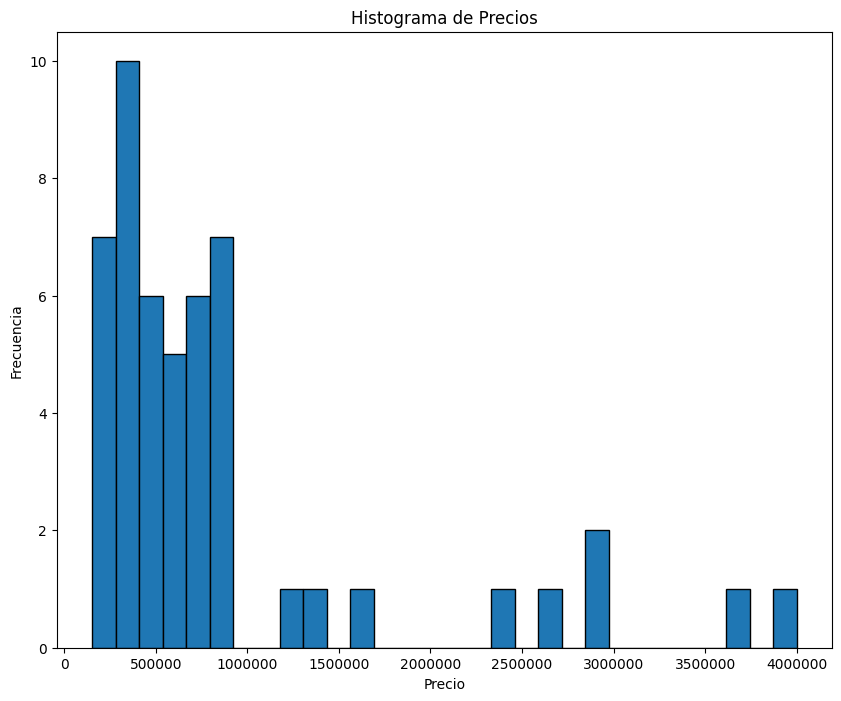

50


In [5]:
# Resolver acá
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
df["Precio"].hist(bins=30, edgecolor='black')  # Ajusta el número de bins según lo que necesites
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
# Ajustar el formato del eje x
ax = plt.gca()  # Obtener formato del eje actual (lo muestra con notación científica)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))  # Mostrar números enteros sin notacion cientifica
plt.grid(False)
plt.show()


#n de muestra para checkear
print(df.shape[0])
# se pueden ver outliers ya que no hay muchas televisiones mayores a $1500000 (solo se ven 4). Sin embargo, la muestra solo es de n=50 por lo que necesitariamos mas para afirmar que son outliers. La observacion que se encuentra mas distanciada cuesta $4000000 

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [6]:
# Resolver aca 
# Link de la API de Mercado Librepara obtener los ítems de una categoría (cafetera)
url = "https://api.mercadolibre.com/sites/MLA/search"

# Parámetros de la consulta: Cafeteras en Argentina y límite de ítems (en este caso establezco 30)
params = {
    "category": "MLA407134",  # Categoría de cafeteras en Argentina
    "limit": 30 
}
# Con más de 50 tira error 400 

# Realizo la consulta
response = requests.get(url, params=params)

# Verifico que efectivamente tira lo que se pide 
if response.status_code == 200:
    data = response.json()
    results = data['results']
    
    # Mostrar los primeros 10 ítems de cafeteras con las condiciones del producto, pagos, etc. 
    print("Primeros 10 productos de la categoría 'Cafeteras':\n")
    for item in results[:10]:
        print(f"ID: {item['id']}")
        print(f"Título: {item['title']}")
        print(f"Precio: ARS {item['price']}")
        print(f"Acepta Mercado Pago: {item['accepts_mercadopago']}")
        print(f"Envío Gratis: {item['shipping']['free_shipping']}")
        print(f"Condición: {item['condition']}")
        print("-" * 50)
    
    # Análisis adicional: Promedio de precios de los items llamados 
    prices = [item['price'] for item in results]
    avg_price = sum(prices) / len(prices)
    print(f"\nPrecio promedio de las cafeteras: ARS {avg_price:.2f}")
    
    # Cantidad de productos que ofrecen envío gratis (de los 30 items)
    free_shipping_count = sum(item['shipping']['free_shipping'] for item in results)
    print(f"Cantidad de productos con envío gratis: {free_shipping_count} de {len(results)}")
else:
    print(f"Error en la consulta: {response.status_code}, {response.json()['message']}")



Primeros 10 productos de la categoría 'Cafeteras':

ID: MLA1423614361
Título: Set Juego Llaves Tubos Y Puntas Combinadas 108 Pz + Valija
Precio: ARS 78675
Acepta Mercado Pago: True
Envío Gratis: True
Condición: new
--------------------------------------------------
ID: MLA1797123216
Título: Hidrolavadora Electrica Trent Hlt203 1400w Alta Presion 1600 Psi 110 Bar Con Accesorios By Femmto
Precio: ARS 94239.7
Acepta Mercado Pago: True
Envío Gratis: True
Condición: new
--------------------------------------------------
ID: MLA1608024744
Título: Kit Herramientas Precision 115 En 1 Celulares Electronic Pro
Precio: ARS 11881
Acepta Mercado Pago: True
Envío Gratis: False
Condición: new
--------------------------------------------------
ID: MLA1432580188
Título: Taladro Atornillador Percutor + 2 Baterias Gp By Lusqtoff
Precio: ARS 109907.35
Acepta Mercado Pago: True
Envío Gratis: True
Condición: new
--------------------------------------------------
ID: MLA1388328193
Título: Hidrolavadora Elect

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [7]:
# Llamo al URL de la portada de La Nación
url = "https://www.lanacion.com.ar/"

# Quiero obtener el contenido de la página
respuesta = requests.get(url)
respuesta.raise_for_status()  

In [8]:
# Contenido HTML con BeautifulSoup
soup = BeautifulSoup(respuesta.content, 'html.parser') # Me hace el parseo de html y lo llamo con .content para tener el contenido más ordenado

# Buscamos todos los enlaces de noticias en la portada
links = [] # Creo la lista para los links 
for link in soup.find_all('a', href=True): 
    href = link['href'] # Links de la página 
    full_url = urljoin(url, href)
    if full_url.startswith(url):
        links.append(full_url)

# Elimino los enlaces duplicados
links = list(set(links))
for a in links:
    
    print(a)
#como no podemos llamar solo a los de la portada porque traia links que no iban, dijiste que lo hagamos en general

https://www.lanacion.com.ar/horoscopo/horoscopo-las-predicciones-de-jimena-la-torre-para-la-semana-del-8-al-14-de-septiembre-nid08092024/
https://www.lanacion.com.ar/economia/finanzas-los-cambios-recientes-en-la-industria-de-fondos-comunes-nid08092024/
https://www.lanacion.com.ar/horoscopo/
https://www.lanacion.com.ar/tema/podcasts-tid64878/
https://www.lanacion.com.ar/lifestyle/que-es-la-gente-nutritiva-y-cuales-son-sus-caracteristicas-nid17112023/
https://www.lanacion.com.ar/economia/campo/dia-del-productor-agropecuario-maneja-7300-hectareas-y-cuenta-la-formula-de-un-impactante-logro-en-nid08092024/
https://www.lanacion.com.ar/conversaciones-de-domingo/dante-sica-el-programa-de-desregulaciones-de-milei-es-similar-al-de-macri-pero-macri-fue-un-liberal-nid08092024/
https://www.lanacion.com.ar/sabado/un-clasico-de-la-parrilla-julio-iglesias-mandaba-un-avion-para-hacerse-llevar-los-bifes-a-brasil-nid07092024/
https://www.lanacion.com.ar/propiedades/inmuebles-comerciales/
https://www.lana